# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.062752e+01     6.846704e+00
 * time: 0.0050318241119384766
     1     2.720744e+01     4.441823e+00
 * time: 0.014755010604858398
     2     2.119932e+01     7.694968e+00
 * time: 0.03965401649475098
     3     1.234065e+01     2.796468e+00
 * time: 0.06789803504943848
     4     1.107737e+01     2.841394e+00
 * time: 0.08735799789428711
     5     1.075732e+01     1.465903e+00
 * time: 0.10718083381652832
     6     9.974759e+00     1.070536e+00
 * time: 0.12748503684997559
     7     9.297233e+00     1.168028e+00
 * time: 0.1479349136352539
     8     8.984414e+00     7.394773e-01
 * time: 0.16826581954956055
     9     8.940776e+00     1.370624e+00
 * time: 0.18385100364685059
    10     8.895828e+00     1.217899e+00
 * time: 0.19893884658813477
    11     8.792367e+00     6.444842e-01
 * time: 0.2142348289489746
    12     8.717043e+00     4.863787e-01
 * time: 0.229719877243042
    13     8.658767e+00     4.588889e-01
 * time: 

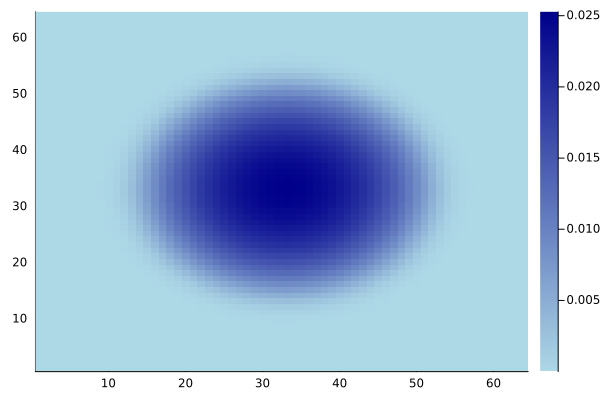

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)